In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread, imshow

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [3]:

model_dir = "/content/drive/MyDrive/Deep/model.h5"

labels = ["Closed", "Open"]
IMG_SIZE = 48

model = tf.keras.models.load_model(model_dir)
model.summary()


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 15, 15, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 4, 4, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_51 (Flatten)        (None, 512)               0         
                                                                 
 dropout_98 (Dropout)        (None, 512)             

In [4]:

def prepare(filepath):
    img_array = imread(filepath)
    # print(img_array.shape)
    resized_array = resize(img_array, (1, IMG_SIZE, IMG_SIZE, 1))
    resized_array = resized_array / 255
    # print(resized_array.shape)
    return resized_array


def predict(filepath):
    prediction = model.predict(prepare(filepath))
    return labels[((prediction > 0.2)*1)[0][0]]


Prediction Open
Time 8.264395236968994


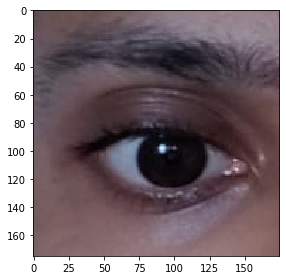

In [5]:

image_path = "/content/drive/MyDrive/Deep/images/1.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)



Prediction Closed
Time 0.09580874443054199


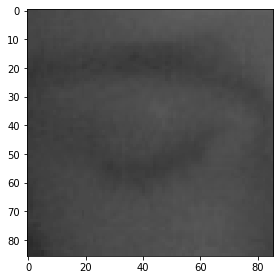

In [6]:
image_path = "/content/drive/MyDrive/Deep/images/0.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)

Prediction Open
Time 0.39490556716918945


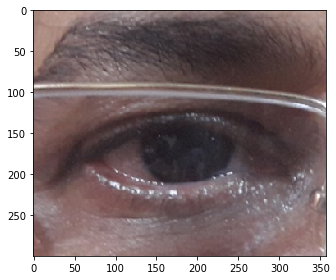

In [7]:
image_path = "/content/drive/MyDrive/Deep/images/2.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)

Prediction Closed
Time 0.25612545013427734


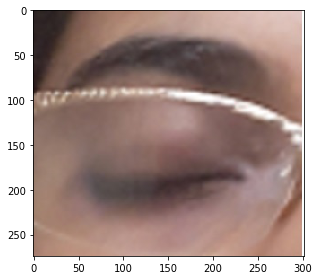

In [8]:
image_path = "/content/drive/MyDrive/Deep/images/3.jpg"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)